In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
file=r"train.parquet"

In [3]:
test_file=r"test.parquet"

In [4]:
train_data=pd.read_parquet(file,engine='auto')#Reading the dataset

In [5]:
test_data=pd.read_parquet(test_file,engine='auto')

In [6]:
train_data.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [7]:
test_data.head()

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0


## EDA

In [8]:
print(train_data.shape,train_data.columns)
print()
print(test_data.shape,test_data.columns)

(3220868, 3) Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')

(1065524, 3) Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220868 entries, 0 to 29080911
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient-Uid  object        
 1   Date         datetime64[ns]
 2   Incident     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 98.3+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065524 entries, 0 to 1372859
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Patient-Uid  1065524 non-null  object        
 1   Date         1065524 non-null  datetime64[ns]
 2   Incident     1065524 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 32.5+ MB


In [11]:
# Checking any duplicate records in train and test data
print(train_data.duplicated().sum())
print()
print(test_data.duplicated().sum())

35571

12100


In [12]:
#Checking for null values in both train and test data
print("Total NULL values in train data = ",train_data.isnull().sum().sum())
print()
print("Total NULL values in test data = ",test_data.isnull().sum().sum())

Total NULL values in train data =  0

Total NULL values in test data =  0


In [13]:
#Checking Unique values in each columns in both train and test
def info_col(train,feature):
    print("Unique valies in ", feature  ,len(train[feature].unique()))
    print()
    
for f in train_data[['Patient-Uid', 'Date', 'Incident']]:
    info_col(train_data,f)

Unique valies in  Patient-Uid 27033

Unique valies in  Date 1977

Unique valies in  Incident 57



In [14]:
#For testing data
def info_col(test,feature):
    print("Unique valies in ", feature  ,len(test[feature].unique()))
    print()
    
for f in test_data[['Patient-Uid', 'Date', 'Incident']]:
    info_col(test_data,f)

Unique valies in  Patient-Uid 11482

Unique valies in  Date 1947

Unique valies in  Incident 55



In [15]:
#checking total nuber of TARGET DRUG in Incident column in train data
len(train_data[train_data['Incident']=='TARGET DRUG'])

67218

In [16]:
#checking total nuber of TARGET DRUG in Incident column in test data
len(test_data[test_data['Incident']=='TARGET DRUG'])

0

In [17]:
#Checking the top 10 total number of each categories in Incident 
train_data['Incident'].value_counts().sort_values(ascending=False).head(10)

DRUG_TYPE_6          561934
DRUG_TYPE_1          484666
PRIMARY_DIAGNOSIS    431902
DRUG_TYPE_0          300005
DRUG_TYPE_7          258782
DRUG_TYPE_2          256841
DRUG_TYPE_8          160066
DRUG_TYPE_3          127676
TEST_TYPE_1           96810
TARGET DRUG           67218
Name: Incident, dtype: int64

<AxesSubplot:xlabel='Incident', ylabel='count'>

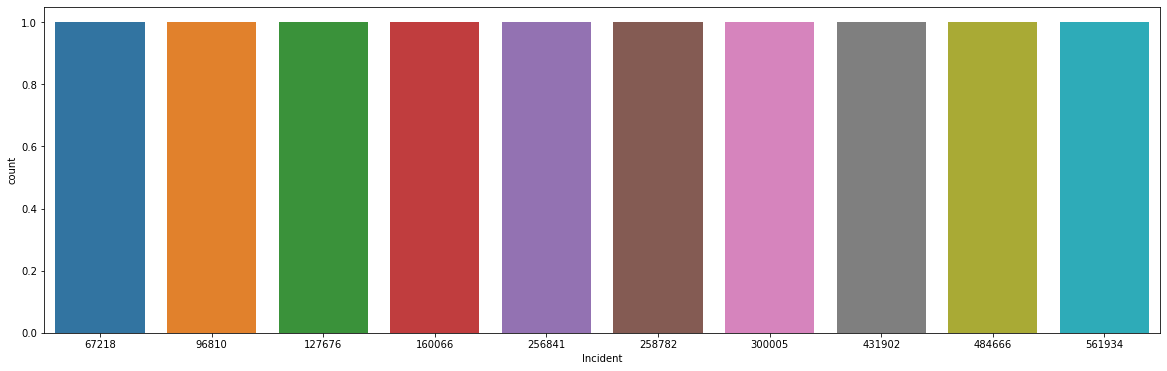

In [18]:
#visualization of most freaquent categories and their count in Incident columns
fig, ax = plt.subplots(figsize=(20,6))
sns.countplot(x=train_data.Incident.value_counts().sort_values(ascending=False).head(10), data=train_data)


## FEATURE ENGINEERING


In [19]:
# Rmove all duplicates data from train and test data
train_data.drop_duplicates(inplace=True)

test_data.drop_duplicates(inplace=True)



In [20]:
print(train_data.duplicated().sum())
print()
print(test_data.duplicated().sum())

0

0


In [21]:
print(train_data.shape)
print()
print(test_data.shape)

(3185297, 3)

(1053424, 3)


### Pre-processing feature Patient-Uid

##### Datas in Patient-Uid in text format . So , here i am using NLP technique Bagofwords 

In [22]:
import nltk
import re
from nltk.corpus import stopwords

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MANEESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

####### Reseting the index of both train and test data,Because index are not in correct order


In [24]:
train_data.index[2]#So,there is no index of 2

3

In [25]:
train_data.reset_index(inplace=True)

In [26]:
train_data.drop('index',axis=1,inplace=True)

In [27]:
train_data.index[2]#Now its ok.

2

In [28]:
train_data.head(3)

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0


In [29]:
test_data.index[5]

6

In [30]:
test_data.reset_index(inplace=True)

In [31]:
test_data.drop('index',axis=1,inplace=True)

In [32]:
test_data.head(6)

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
5,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-05-09,PRIMARY_DIAGNOSIS


In [33]:
#spliting the data for pre-processing train data
PatientUid_list = []
for i in range(0, len(train_data)):
    PatientUid = train_data['Patient-Uid'][i].split('-')
    PatientUid = ' '.join(PatientUid)
    PatientUid_list.append(PatientUid)

In [34]:
#spliting the data for pre-processing test data
PatientUid_listtst = []
for i in range(0, len(test_data)):
    PatientUid = test_data['Patient-Uid'][i].split('-')
    PatientUid = ' '.join(PatientUid)
    PatientUid_listtst.append(PatientUid)

In [35]:
PatientUid_list[0:5]

['a0db1e73 1c7c 11ec ae39 16262ee38c7f',
 'a0dc93f2 1c7c 11ec 9cd2 16262ee38c7f',
 'a0dc94c6 1c7c 11ec a3a0 16262ee38c7f',
 'a0dc950b 1c7c 11ec b6ec 16262ee38c7f',
 'a0dc9543 1c7c 11ec bb63 16262ee38c7f']

In [36]:
PatientUid_listtst[0:5]

['a0f9e8a9 1c7c 11ec 8d25 16262ee38c7f',
 'a0f9e8a9 1c7c 11ec 8d25 16262ee38c7f',
 'a0f9e8a9 1c7c 11ec 8d25 16262ee38c7f',
 'a0f9e8a9 1c7c 11ec 8d25 16262ee38c7f',
 'a0f9e8a9 1c7c 11ec 8d25 16262ee38c7f']

In [37]:

from tensorflow.keras.preprocessing.text import one_hot
voc_size=4000 # Considering total size of word

In [38]:
# applying one hot encoding on train and test data for coverting each word to neumeric values
onehot_PUID=[one_hot(words,voc_size)for words in PatientUid_list] 
onehot_PUID

[[2554, 3405, 3839, 376, 2934],
 [3931, 3405, 3839, 3515, 2934],
 [1066, 3405, 3839, 2044, 2934],
 [319, 3405, 3839, 170, 2934],
 [3663, 3405, 3839, 2054, 2934],
 [1085, 3405, 3839, 3136, 2934],
 [1789, 3405, 3839, 394, 2934],
 [921, 3405, 3839, 992, 2934],
 [2898, 3405, 3839, 343, 2934],
 [2282, 3405, 3839, 757, 2934],
 [3065, 3405, 3839, 3931, 2934],
 [3899, 3405, 3839, 1617, 2934],
 [3181, 3405, 3839, 2897, 2934],
 [2972, 3405, 3839, 1946, 2934],
 [3671, 3405, 3839, 3308, 2934],
 [1221, 3405, 3839, 1275, 2934],
 [2424, 3405, 3839, 2489, 2934],
 [47, 3405, 3839, 296, 2934],
 [3189, 3405, 3839, 1974, 2934],
 [2023, 3405, 3839, 1598, 2934],
 [613, 3405, 3839, 1695, 2934],
 [596, 3405, 3839, 247, 2934],
 [102, 3405, 3839, 2225, 2934],
 [1247, 3405, 3839, 2702, 2934],
 [2270, 3405, 3839, 3268, 2934],
 [81, 3405, 3839, 2269, 2934],
 [2713, 3405, 3839, 1473, 2934],
 [603, 3405, 3839, 2209, 2934],
 [3809, 3405, 3839, 2158, 2934],
 [3699, 3405, 3839, 2384, 2934],
 [1595, 3405, 3839, 2049, 29

In [39]:
Patient_UIDdata=np.array(onehot_PUID)

In [40]:
Patient_UIDdata

array([[2554, 3405, 3839,  376, 2934],
       [3931, 3405, 3839, 3515, 2934],
       [1066, 3405, 3839, 2044, 2934],
       ...,
       [1771, 3405, 3839, 3349, 2934],
       [3429, 3405, 3839, 1327, 2934],
       [3047, 3405, 3839, 1514, 2934]])

In [41]:
Patient_UIDdata.shape

(3185297, 5)

In [42]:
Patient_UIDdata=pd.DataFrame(Patient_UIDdata)

In [43]:
Patient_UIDdata.shape

(3185297, 5)

In [44]:
Patient_UIDdata.head()

,0,1,2,3,4
0,2554,3405,3839,376,2934
1,3931,3405,3839,3515,2934
2,1066,3405,3839,2044,2934
3,319,3405,3839,170,2934
4,3663,3405,3839,2054,2934


In [45]:
train_datacpy=train_data.copy()

In [46]:
train_datacpy.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [47]:
finaltrain_data=pd.concat([train_datacpy, Patient_UIDdata], axis=1)

In [48]:
finaltrain_data.head()

,Patient-Uid,Date,Incident,0,1,2,3,4
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS,2554,3405,3839,376,2934
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS,3931,3405,3839,3515,2934
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0,1066,3405,3839,2044,2934
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0,319,3405,3839,170,2934
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1,3663,3405,3839,2054,2934


In [49]:
finaltrain_data.dtypes

Patient-Uid            object
Date           datetime64[ns]
Incident               object
0                       int32
1                       int32
2                       int32
3                       int32
4                       int32
dtype: object

In [50]:
#Removing Patient-UID
finaltrain_data=finaltrain_data.drop('Patient-Uid',axis=1)

In [51]:
finaltrain_data

,Date,Incident,0,1,2,3,4
0,2019-03-09,PRIMARY_DIAGNOSIS,2554,3405,3839,376,2934
1,2015-05-16,PRIMARY_DIAGNOSIS,3931,3405,3839,3515,2934
2,2018-01-30,SYMPTOM_TYPE_0,1066,3405,3839,2044,2934
3,2015-04-22,DRUG_TYPE_0,319,3405,3839,170,2934
4,2016-06-18,DRUG_TYPE_1,3663,3405,3839,2054,2934
...,...,...,...,...,...,...,...
3185292,2018-07-06,DRUG_TYPE_6,1400,3405,3839,710,2934
3185293,2017-12-29,DRUG_TYPE_6,731,3405,3839,1048,2934
3185294,2018-10-18,DRUG_TYPE_10,1771,3405,3839,3349,2934
3185295,2015-09-18,DRUG_TYPE_6,3429,3405,3839,1327,2934


In [52]:
#for test data
onehot_PUIDtst=[one_hot(words,voc_size)for words in PatientUid_listtst] 
onehot_PUIDtst

[[2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 3405, 3839, 3246, 2934],
 [2284, 34

In [53]:
Patient_UIDdatatst=np.array(onehot_PUIDtst)

In [54]:
Patient_UIDdatatst

array([[2284, 3405, 3839, 3246, 2934],
       [2284, 3405, 3839, 3246, 2934],
       [2284, 3405, 3839, 3246, 2934],
       ...,
       [2329, 3405, 3839, 3301, 2934],
       [2329, 3405, 3839, 3301, 2934],
       [2329, 3405, 3839, 3301, 2934]])

In [55]:
Patient_UIDdatatst.shape

(1053424, 5)

In [56]:
Patient_UIDdatatstdf=pd.DataFrame(Patient_UIDdatatst)

In [57]:
Patient_UIDdatatstdf.head()

,0,1,2,3,4
0,2284,3405,3839,3246,2934
1,2284,3405,3839,3246,2934
2,2284,3405,3839,3246,2934
3,2284,3405,3839,3246,2934
4,2284,3405,3839,3246,2934


In [58]:
test_datacp=test_data.copy()

In [59]:
finaltest_data=pd.concat([test_datacp, Patient_UIDdatatstdf], axis=1)

In [60]:
#Removing Patient-UID
finaltest_data=finaltest_data.drop('Patient-Uid',axis=1)

In [61]:
finaltest_data.head()

,Date,Incident,0,1,2,3,4
0,2016-12-08,SYMPTOM_TYPE_0,2284,3405,3839,3246,2934
1,2018-10-17,DRUG_TYPE_0,2284,3405,3839,3246,2934
2,2017-12-01,DRUG_TYPE_2,2284,3405,3839,3246,2934
3,2018-12-05,DRUG_TYPE_1,2284,3405,3839,3246,2934
4,2017-11-04,SYMPTOM_TYPE_0,2284,3405,3839,3246,2934


### Pre-processing on Date column 

In [62]:
finaltrain_data['Date'].dtypes

dtype('<M8[ns]')

In [63]:
import datetime as dt

In [64]:
#finaltrain_data=finaltrain_data.drop('Month',axis=1)

In [65]:
finaltrain_data['Month']=finaltrain_data['Date'].dt.month
finaltrain_data['day']=finaltrain_data['Date'].dt.day
finaltrain_data['Year']=finaltrain_data['Date'].dt.year

In [66]:
finaltrain_data

,Date,Incident,0,1,2,3,4,Month,day,Year
0,2019-03-09,PRIMARY_DIAGNOSIS,2554,3405,3839,376,2934,3,9,2019
1,2015-05-16,PRIMARY_DIAGNOSIS,3931,3405,3839,3515,2934,5,16,2015
2,2018-01-30,SYMPTOM_TYPE_0,1066,3405,3839,2044,2934,1,30,2018
3,2015-04-22,DRUG_TYPE_0,319,3405,3839,170,2934,4,22,2015
4,2016-06-18,DRUG_TYPE_1,3663,3405,3839,2054,2934,6,18,2016
...,...,...,...,...,...,...,...,...,...,...
3185292,2018-07-06,DRUG_TYPE_6,1400,3405,3839,710,2934,7,6,2018
3185293,2017-12-29,DRUG_TYPE_6,731,3405,3839,1048,2934,12,29,2017
3185294,2018-10-18,DRUG_TYPE_10,1771,3405,3839,3349,2934,10,18,2018
3185295,2015-09-18,DRUG_TYPE_6,3429,3405,3839,1327,2934,9,18,2015


### For test data

In [67]:
finaltest_data['Month']=finaltest_data['Date'].dt.month
finaltest_data['day']=finaltest_data['Date'].dt.day
finaltest_data['Year']=finaltest_data['Date'].dt.year

In [68]:
finaltest_data.head()

,Date,Incident,0,1,2,3,4,Month,day,Year
0,2016-12-08,SYMPTOM_TYPE_0,2284,3405,3839,3246,2934,12,8,2016
1,2018-10-17,DRUG_TYPE_0,2284,3405,3839,3246,2934,10,17,2018
2,2017-12-01,DRUG_TYPE_2,2284,3405,3839,3246,2934,12,1,2017
3,2018-12-05,DRUG_TYPE_1,2284,3405,3839,3246,2934,12,5,2018
4,2017-11-04,SYMPTOM_TYPE_0,2284,3405,3839,3246,2934,11,4,2017


### Label Encodig 

In [69]:
from sklearn import preprocessing

In [70]:
label_encoder = preprocessing.LabelEncoder()


In [71]:
finaltrain_data['Incidentlb']=label_encoder.fit_transform(finaltrain_data['Incident'])

In [72]:
finaltrain_data.head()

,Date,Incident,0,1,2,3,4,Month,day,Year,Incidentlb
0,2019-03-09,PRIMARY_DIAGNOSIS,2554,3405,3839,376,2934,3,9,2019,19
1,2015-05-16,PRIMARY_DIAGNOSIS,3931,3405,3839,3515,2934,5,16,2015,19
2,2018-01-30,SYMPTOM_TYPE_0,1066,3405,3839,2044,2934,1,30,2018,20
3,2015-04-22,DRUG_TYPE_0,319,3405,3839,170,2934,4,22,2015,0
4,2016-06-18,DRUG_TYPE_1,3663,3405,3839,2054,2934,6,18,2016,1


## on test data 

In [73]:
finaltest_data['Incidentlbtst']=label_encoder.fit_transform(finaltest_data['Incident'])

In [74]:
finaltest_data.head()

,Date,Incident,0,1,2,3,4,Month,day,Year,Incidentlbtst
0,2016-12-08,SYMPTOM_TYPE_0,2284,3405,3839,3246,2934,12,8,2016,19
1,2018-10-17,DRUG_TYPE_0,2284,3405,3839,3246,2934,10,17,2018,0
2,2017-12-01,DRUG_TYPE_2,2284,3405,3839,3246,2934,12,1,2017,10
3,2018-12-05,DRUG_TYPE_1,2284,3405,3839,3246,2934,12,5,2018,1
4,2017-11-04,SYMPTOM_TYPE_0,2284,3405,3839,3246,2934,11,4,2017,19


## Creating new column for out Objective

Each patient-uid should be labeled with a binary value of 1 or 0 using the built
model, 1 is considered as eligible for the “Target Drug” in the next 30 days and 0
considered as un-eligible

In [75]:
finaltrain_data['Target']=np.where(finaltrain_data['Incident']=='TARGET DRUG',1,0)

C:\Users\MANEESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

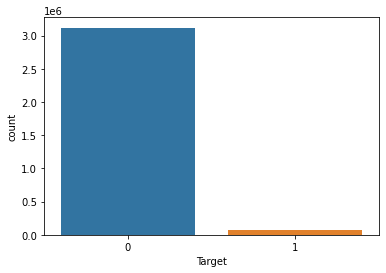

In [76]:
sns.countplot(finaltrain_data['Target'])

In [77]:
finaltrain_data=finaltrain_data.drop('Incident',axis=1)

In [78]:
finaltrain_data=finaltrain_data.drop('Date',axis=1)

In [79]:
finaltrain_data

,0,1,2,3,4,Month,day,Year,Incidentlb,Target
0,2554,3405,3839,376,2934,3,9,2019,19,0
1,3931,3405,3839,3515,2934,5,16,2015,19,0
2,1066,3405,3839,2044,2934,1,30,2018,20,0
3,319,3405,3839,170,2934,4,22,2015,0,0
4,3663,3405,3839,2054,2934,6,18,2016,1,0
...,...,...,...,...,...,...,...,...,...,...
3185292,1400,3405,3839,710,2934,7,6,2018,15,0
3185293,731,3405,3839,1048,2934,12,29,2017,15,0
3185294,1771,3405,3839,3349,2934,10,18,2018,2,0
3185295,3429,3405,3839,1327,2934,9,18,2015,15,0


In [80]:
len(finaltrain_data[finaltrain_data['Target']==1])

67218

In [81]:
len(test_data[test_data['Incident']=='TARGET DRUG'])

0

In [82]:
#Removing Datae and Incident columns from test data

finaltest_data=finaltest_data.drop(['Date','Incident'],axis=1)

In [83]:
finaltest_data.head()

,0,1,2,3,4,Month,day,Year,Incidentlbtst
0,2284,3405,3839,3246,2934,12,8,2016,19
1,2284,3405,3839,3246,2934,10,17,2018,0
2,2284,3405,3839,3246,2934,12,1,2017,10
3,2284,3405,3839,3246,2934,12,5,2018,1
4,2284,3405,3839,3246,2934,11,4,2017,19


In [84]:
finaltest_data.shape

(1053424, 9)

# Handling imbalanced data 

In [85]:
finaltrain_data['Target'].value_counts()

0    3118079
1      67218
Name: Target, dtype: int64

C:\Users\MANEESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

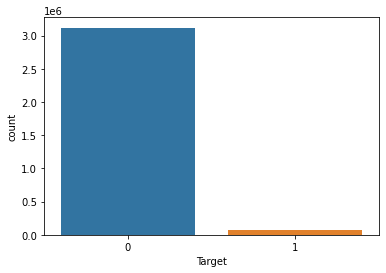

In [86]:
sns.countplot(finaltrain_data['Target'])

Scaling the features is to avoid intensive computation and also avoid one variable dominating the others. For a binary classification problem, no need to scale the dependent variable. But for regression, we need to scale the dependent variables.

## Oversampling 

In [87]:
#Taking class count of 1 an 0

count_class_0, count_class_1 = finaltrain_data['Target'].value_counts()



In [88]:
# Divide by class
class_0 = finaltrain_data[finaltrain_data['Target'] == 0]
class_1 = finaltrain_data[finaltrain_data['Target'] == 1]

In [89]:
count_class_0, count_class_1

(3118079, 67218)

In [90]:
# Oversample 1-class and concat the DataFrames of both classes
class_1_over =class_1.sample(count_class_0, replace=True)
final_data = pd.concat([class_0, class_1_over], axis=0)

print('Random over-sampling:')
print(final_data.Target.value_counts())

Random over-sampling:
0    3118079
1    3118079
Name: Target, dtype: int64


In [91]:
#Final data for model 
final_data.head()

,0,1,2,3,4,Month,day,Year,Incidentlb,Target
0,2554,3405,3839,376,2934,3,9,2019,19,0
1,3931,3405,3839,3515,2934,5,16,2015,19,0
2,1066,3405,3839,2044,2934,1,30,2018,20,0
3,319,3405,3839,170,2934,4,22,2015,0,0
4,3663,3405,3839,2054,2934,6,18,2016,1,0


C:\Users\MANEESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

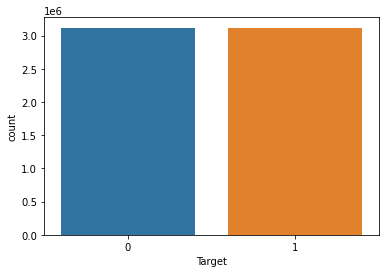

In [92]:
sns.countplot(final_data['Target'])

# Feature Selection

In this case  , not do any kind of features of selection because  here we having only very less number of features, all of these features are important for the model training.

# Model Creation


In [93]:
final_datacop=final_data.copy

In [94]:
#split the traimn data into input and output
x=final_data.drop('Target',axis=1)
y=final_data['Target']

In [95]:
x.head()

,0,1,2,3,4,Month,day,Year,Incidentlb
0,2554,3405,3839,376,2934,3,9,2019,19
1,3931,3405,3839,3515,2934,5,16,2015,19
2,1066,3405,3839,2044,2934,1,30,2018,20
3,319,3405,3839,170,2934,4,22,2015,0
4,3663,3405,3839,2054,2934,6,18,2016,1


In [96]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [98]:
print(X_train.shape,'\n')
print(X_test.shape,'\n')
print(y_train.shape,'\n')
print(y_test.shape)

(4365310, 9) 

(1870848, 9) 

(4365310,) 

(1870848,)


In [99]:
print(y_test.value_counts())
print()
print(y_train.value_counts())

1    935771
0    935077
Name: Target, dtype: int64

0    2183002
1    2182308
Name: Target, dtype: int64


In [100]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [101]:
from sklearn.metrics import roc_auc_score, f1_score

In [102]:
y_train.value_counts()

0    2183002
1    2182308
Name: Target, dtype: int64

In [103]:
len(X_train.columns)

9

In [104]:
input_=9

## Creating Neural Network 

In [174]:
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=input_, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
136416/136416 [==============================] - 167s 1ms/step - loss: 0.0345
Epoch 2/10
136416/136416 [==============================] - 170s 1ms/step - loss: 0.0024
Epoch 3/10
136416/136416 [==============================] - 160s 1ms/step - loss: 8.0050e-04
Epoch 4/10
136416/136416 [==============================] - 1480s 11ms/step - loss: 4.4239e-04
Epoch 5/10
136416/136416 [==============================] - 149s 1ms/step - loss: 3.3414e-04
Epoch 6/10
136416/136416 [==============================] - 167s 1ms/step - loss: 2.8391e-04
Epoch 7/10
136416/136416 [==============================] - 163s 1ms/step - loss: 2.9227e-04
Epoch 8/10
136416/136416 [==============================] - 164s 1ms/step - loss: 2.1578e-04
Epoch 9/10
136416/136416 [==============================] - 413s 3ms/step - loss: 2.1783e-04
Epoch 10/10
136416/136416 [==============================] - 167s 1ms/step - loss: 2.3191e-04


In [175]:
 y_pred1=model.predict(X_test)

In [176]:
y_pred1

array([[0.        ],
       [0.99998856],
       [0.9999995 ],
       ...,
       [0.        ],
       [0.        ],
       [0.99995184]], dtype=float32)

In [178]:
y_pred1lst=[]
for val in y_pred1:
    
    if val>0.5:
        val=1
    else:
        val=0
    y_pred1lst.append(val)
        
        
    #print(i)
    

In [179]:
y_pred1lst

[0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,


In [111]:
yp=pd.DataFrame(y_pred1lst)

In [180]:
roc_auc_score(y_test,y_pred1lst)

1.0

In [113]:
from sklearn.metrics import classification_report

In [116]:
from sklearn.metrics import f1_score

In [181]:
f1_score(y_test, y_pred1lst, average='macro')

1.0

# Standardization

In [105]:
final_data

,0,1,2,3,4,Month,day,Year,Incidentlb,Target
0,2554,3405,3839,376,2934,3,9,2019,19,0
1,3931,3405,3839,3515,2934,5,16,2015,19,0
2,1066,3405,3839,2044,2934,1,30,2018,20,0
3,319,3405,3839,170,2934,4,22,2015,0,0
4,3663,3405,3839,2054,2934,6,18,2016,1,0
...,...,...,...,...,...,...,...,...,...,...
2163433,2977,3405,3839,2615,2934,4,23,2020,50,1
2393191,335,3405,3839,3193,2934,5,14,2020,50,1
2991093,1134,3405,3839,728,2934,8,27,2020,50,1
2208674,3154,3405,3839,1806,2934,8,9,2018,50,1


In [106]:
Xinp=final_data.drop('Target',axis=1)
Yinp=final_data['Target']

In [107]:
Xinp

,0,1,2,3,4,Month,day,Year,Incidentlb
0,2554,3405,3839,376,2934,3,9,2019,19
1,3931,3405,3839,3515,2934,5,16,2015,19
2,1066,3405,3839,2044,2934,1,30,2018,20
3,319,3405,3839,170,2934,4,22,2015,0
4,3663,3405,3839,2054,2934,6,18,2016,1
...,...,...,...,...,...,...,...,...,...
2163433,2977,3405,3839,2615,2934,4,23,2020,50
2393191,335,3405,3839,3193,2934,5,14,2020,50
2991093,1134,3405,3839,728,2934,8,27,2020,50
2208674,3154,3405,3839,1806,2934,8,9,2018,50


In [108]:
Yinp

0          0
1          0
2          0
3          0
4          0
          ..
2163433    1
2393191    1
2991093    1
2208674    1
2224920    1
Name: Target, Length: 6236158, dtype: int32

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()


In [111]:
Xinpcpy=Xinp.copy

In [112]:
std_data=scaler.fit_transform(Xinp)

C:\Users\MANEESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\MANEESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [113]:
std_data

array([[ 0.49492534,  0.        ,  0.        , ..., -0.77116013,
         0.43563567, -0.65457583],
       [ 1.69746165,  0.        ,  0.        , ...,  0.02788899,
        -2.37188544, -0.65457583],
       [-0.80454744,  0.        ,  0.        , ...,  1.62598722,
        -0.2662446 , -0.60444366],
       ...,
       [-0.74516294,  0.        ,  0.        , ...,  1.2835376 ,
         1.13751595,  0.89952146],
       [ 1.0189063 ,  0.        ,  0.        , ..., -0.77116013,
        -0.2662446 ,  0.89952146],
       [-1.40974545,  0.        ,  0.        , ..., -0.31456064,
        -0.2662446 ,  0.89952146]])

In [114]:
final_X=pd.DataFrame(std_data,columns=Xinp.columns)

In [115]:
final_X

,0,1,2,3,4,Month,day,Year,Incidentlb
0,0.494925,0.0,0.0,-1.386968,0.0,-1.032335,-0.771160,0.435636,-0.654576
1,1.697462,0.0,0.0,1.344626,0.0,-0.424851,0.027889,-2.371885,-0.654576
2,-0.804547,0.0,0.0,0.064545,0.0,-1.639820,1.625987,-0.266245,-0.604444
3,-1.456904,0.0,0.0,-1.566231,0.0,-0.728593,0.712788,-2.371885,-1.607087
4,1.463417,0.0,0.0,0.073247,0.0,-0.121109,0.256189,-1.670005,-1.556955
...,...,...,...,...,...,...,...,...,...
6236153,0.864332,0.0,0.0,0.561436,0.0,-0.728593,0.826938,1.137516,0.899521
6236154,-1.442931,0.0,0.0,1.064418,0.0,-0.424851,-0.200411,1.137516,0.899521
6236155,-0.745163,0.0,0.0,-1.080653,0.0,0.486376,1.283538,1.137516,0.899521
6236156,1.018906,0.0,0.0,-0.142565,0.0,0.486376,-0.771160,-0.266245,0.899521


In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.30, random_state=42)

In [119]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
136416/136416 [==============================] - 141s 1ms/step - loss: 0.0313
Epoch 2/10
136416/136416 [==============================] - 138s 1ms/step - loss: 0.0017
Epoch 3/10
136416/136416 [==============================] - 137s 1ms/step - loss: 2.9622e-04
Epoch 4/10
136416/136416 [==============================] - 138s 1ms/step - loss: 7.6942e-05
Epoch 5/10
136416/136416 [==============================] - 141s 1ms/step - loss: 4.0113e-05
Epoch 6/10
136416/136416 [==============================] - 141s 1ms/step - loss: 3.0366e-05
Epoch 7/10
136416/136416 [==============================] - 150s 1ms/step - loss: 2.7172e-05
Epoch 8/10
136416/136416 [==============================] - 136s 996us/step - loss: 1.7544e-05
Epoch 9/10
136416/136416 [==============================] - 242s 2ms/step - loss: 2.7204e-05
Epoch 10/10
136416/136416 [==============================] - 133s 978us/step - loss: 2.6597e-05


In [125]:
std_pred=model.predict(X_test)

In [126]:
roc_auc_score(y_test,std_pred)

1.0

In [127]:
std_pred

array([[0.       ],
       [0.9999999],
       [1.       ],
       ...,
       [0.       ],
       [0.       ],
       [1.       ]], dtype=float32)

In [129]:
std_predlst=[]
for i in std_pred:
    if i >0.5:
        i=1
    else:
        i=0
    std_predlst.append(i)

In [130]:
std_predlst

[0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,


# After standardization ,model will shows better accuraccy

In [131]:
f1_score(y_test,std_predlst, average='macro')

1.0

## applying standard scaler on test data 

In [134]:
std_tstdata=scaler.fit_transform(finaltest_data)

C:\Users\MANEESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\MANEESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [135]:
std_tstdata

array([[ 0.24766652,  0.        ,  0.        , ..., -0.87639932,
        -0.86314311,  0.4438164 ],
       [ 0.24766652,  0.        ,  0.        , ...,  0.15272343,
         0.6070774 , -1.12303746],
       [ 0.24766652,  0.        ,  0.        , ..., -1.67682812,
        -0.12803286, -0.29837754],
       ...,
       [ 0.28676389,  0.        ,  0.        , ..., -1.3337872 ,
        -0.12803286, -0.29837754],
       [ 0.28676389,  0.        ,  0.        , ...,  1.06749921,
        -0.12803286,  0.19641842],
       [ 0.28676389,  0.        ,  0.        , ...,  0.38141738,
        -0.12803286,  0.11395243]])

In [137]:
final_tst=pd.DataFrame(std_tstdata,columns=finaltest_data.columns)

In [144]:
final_tst

,0,1,2,3,4,Month,day,Year,Incidentlbtst
0,0.247667,0.0,0.0,1.127994,0.0,1.629667,-0.876399,-0.863143,0.443816
1,0.247667,0.0,0.0,1.127994,0.0,1.042415,0.152723,0.607077,-1.123037
2,0.247667,0.0,0.0,1.127994,0.0,1.629667,-1.676828,-0.128033,-0.298378
3,0.247667,0.0,0.0,1.127994,0.0,1.629667,-1.219440,0.607077,-1.040571
4,0.247667,0.0,0.0,1.127994,0.0,1.336041,-1.333787,-0.128033,0.443816
...,...,...,...,...,...,...,...,...,...
1053419,0.286764,0.0,0.0,1.175720,0.0,-0.425713,-0.533358,-0.128033,-0.710707
1053420,0.286764,0.0,0.0,1.175720,0.0,0.455164,0.724458,0.607077,-0.298378
1053421,0.286764,0.0,0.0,1.175720,0.0,-1.306590,-1.333787,-0.128033,-0.298378
1053422,0.286764,0.0,0.0,1.175720,0.0,0.748790,1.067499,-0.128033,0.196418


In [145]:
test_pred=model.predict(final_tst)

In [146]:
test_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [147]:
std_predtst=[]
for i in test_pred:
    if i >0.5:
        i=1
    else:
        i=0
    std_predtst.append(i)

In [148]:
std_predtst

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [151]:
final_sub=pd.DataFrame(std_predtst,columns=['label'])

In [152]:
final_sub

,label
0,0
1,0
2,0
3,0
4,0
...,...
1053419,0
1053420,0
1053421,0
1053422,0


In [154]:
final_sub=pd.concat([test_data,final_sub],axis=1)

In [156]:
final_sub

,Patient-Uid,Date,Incident,label
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0,0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0,0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2,0
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1,0
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0,0
...,...,...,...,...
1053419,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13,0
1053420,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2,0
1053421,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2,0
1053422,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8,0


In [157]:
final_sub=final_sub.drop(['Date','Incident'],axis=1)

In [159]:
final_sub.duplicated().sum()

1041942

In [160]:
final_sub=final_sub.drop_duplicates()

In [161]:
final_sub.duplicated().sum()

0

In [162]:
final_sub

,Patient-Uid,label
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,0
48,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,0
177,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,0
268,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,0
380,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,0
...,...,...
1053021,a102720c-1c7c-11ec-bd9a-16262ee38c7f,0
1053097,a102723c-1c7c-11ec-9f80-16262ee38c7f,0
1053126,a102726b-1c7c-11ec-bfbf-16262ee38c7f,0
1053213,a102729b-1c7c-11ec-86ba-16262ee38c7f,0


In [164]:
final_submission=pd.read_csv('final_submission.csv')

In [171]:
final_sub.to_csv(r'C:\Users\MANEESH\OneDrive\Desktop\Akaike\Structured_Data_Assignment\final_submission.csv')

In [173]:
pd.read_csv(r'C:\Users\MANEESH\OneDrive\Desktop\Akaike\Structured_Data_Assignment\final_submission.csv')

,Unnamed: 0,Patient-Uid,label
0,0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,0
1,48,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,0
2,177,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,0
3,268,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,0
4,380,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,0
...,...,...,...
11477,1053021,a102720c-1c7c-11ec-bd9a-16262ee38c7f,0
11478,1053097,a102723c-1c7c-11ec-9f80-16262ee38c7f,0
11479,1053126,a102726b-1c7c-11ec-bfbf-16262ee38c7f,0
11480,1053213,a102729b-1c7c-11ec-86ba-16262ee38c7f,0


In [165]:
final_submission

,Patient-Uid,label
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,fill 1 or 0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,fill 1 or 0
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,fill 1 or 0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,fill 1 or 0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,fill 1 or 0
...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,fill 1 or 0
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,fill 1 or 0
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,fill 1 or 0
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,fill 1 or 0
